# 🧠 Autism Prediction ML Project

This notebook covers EDA, model training (balanced & unbalanced), explainable AI, and hyperparameter tuning for autism prediction.

In [6]:
# 🧠 Autism Prediction ML Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('cleaned_autism_data.csv') 
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Others,no,no,Egypt,no,Others,NO


## 📊 Exploratory Data Analysis (EDA)

In [7]:
# Shape and basic info
print("Shape:", df.shape)
df.info()
df.describe(include='all')

Shape: (704, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    int64 
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jaundice         704 non-null    object
 14  autism           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  relation         7

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,relation,Class/ASD
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704,704,704,704,704,704,704,704
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,11,2,2,67,2,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,White-European,no,no,United States,no,Self,NO
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367,233,635,613,113,692,522,515
mean,0.721591,0.453125,0.457386,0.495739,0.500000,0.284091,0.424716,0.649148,0.322443,0.575284,29.696023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.448535,0.498152,0.498535,0.500337,0.500355,0.451301,0.494651,0.477576,0.467744,0.494651,16.484009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


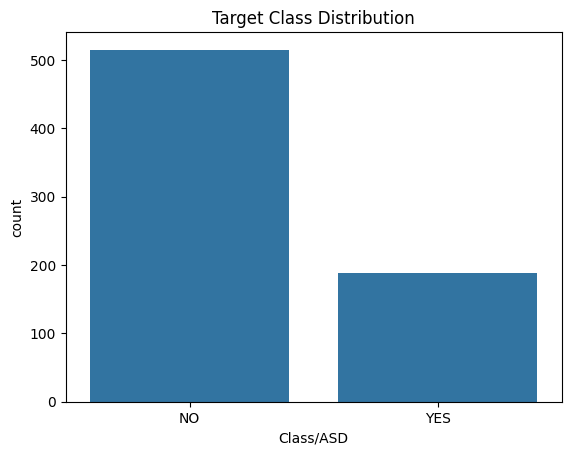

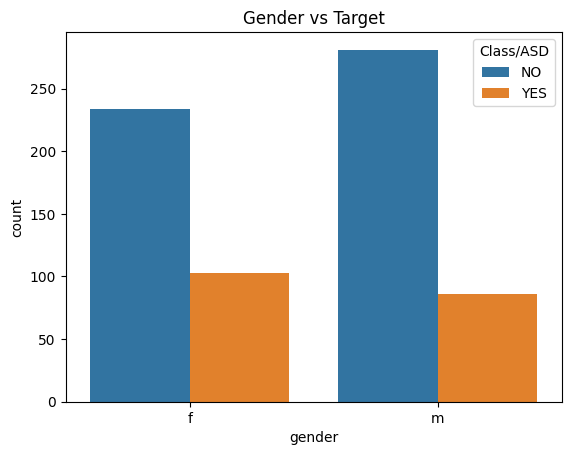

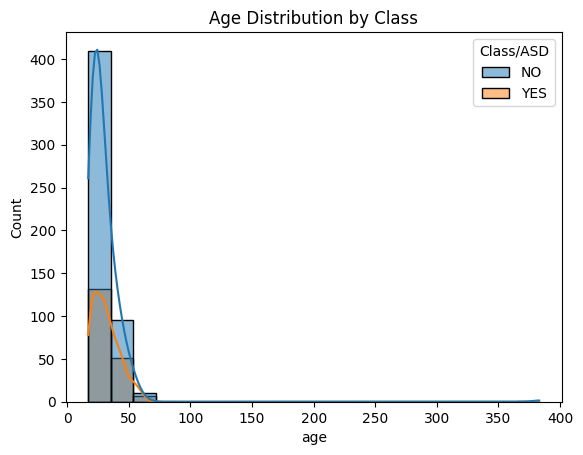

In [8]:
sns.countplot(x='Class/ASD', data=df)
plt.title('Target Class Distribution')
plt.show()

sns.countplot(x='gender', hue='Class/ASD', data=df)
plt.title('Gender vs Target')
plt.show()

sns.histplot(data=df, x='age', hue='Class/ASD', bins=20, kde=True)
plt.title('Age Distribution by Class')
plt.show()


## 🧹 Data Preprocessing

In [10]:
binary_map = {'yes': 1, 'no': 0, 'f': 0, 'm': 1, 'YES': 1, 'NO': 0}
for col in ['gender', 'jaundice', 'autism', 'used_app_before', 'Class/ASD']:
    if df[col].dtype == 'object':
        df[col] = df[col].map(binary_map)

if 'contry_of_res' in df.columns:
    df.rename(columns={'contry_of_res': 'country_of_res'}, inplace=True)

if 'relation' in df.columns:
    df.drop(columns=['relation'], inplace=True)

categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate X and y
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Store models
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'SVM': svm
}

# Train & Evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.9858156028368794
Confusion Matrix:
 [[103   2]
 [  0  36]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.95      1.00      0.97        36

    accuracy                           0.99       141
   macro avg       0.97      0.99      0.98       141
weighted avg       0.99      0.99      0.99       141



--- Random Forest ---
Accuracy: 0.9574468085106383
Confusion Matrix:
 [[102   3]
 [  3  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.92      0.92      0.92        36

    accuracy                           0.96       141
   macro avg       0.94      0.94      0.94       141
weighted avg       0.96      0.96      0.96       141



--- SVM ---
Accuracy: 0.9148936170212766
Confusion Matrix:
 [[101   4]
 [  8  28]]
Classification Repo

In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_bal))

Before SMOTE: [410 153]
After SMOTE: [410 410]


In [14]:
# Initializing same models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

models = {
    'Logistic Regression (SMOTE)': logreg,
    'Random Forest (SMOTE)': rf,
    'SVM (SMOTE)': svm
}

# Training & Evaluation
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression (SMOTE) ---
Accuracy: 0.9858156028368794
Confusion Matrix:
 [[103   2]
 [  0  36]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.95      1.00      0.97        36

    accuracy                           0.99       141
   macro avg       0.97      0.99      0.98       141
weighted avg       0.99      0.99      0.99       141



--- Random Forest (SMOTE) ---
Accuracy: 0.9858156028368794
Confusion Matrix:
 [[104   1]
 [  1  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.97      0.97      0.97        36

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141



--- SVM (SMOTE) ---
Accuracy: 0.9361702127659575
Confusion Matrix:
 [[100   5]
 [  4  

In [16]:
pip install xgboost shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_bal, y_train_bal)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9716312056737588
Confusion Matrix:
 [[101   4]
 [  0  36]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.90      1.00      0.95        36

    accuracy                           0.97       141
   macro avg       0.95      0.98      0.96       141
weighted avg       0.97      0.97      0.97       141



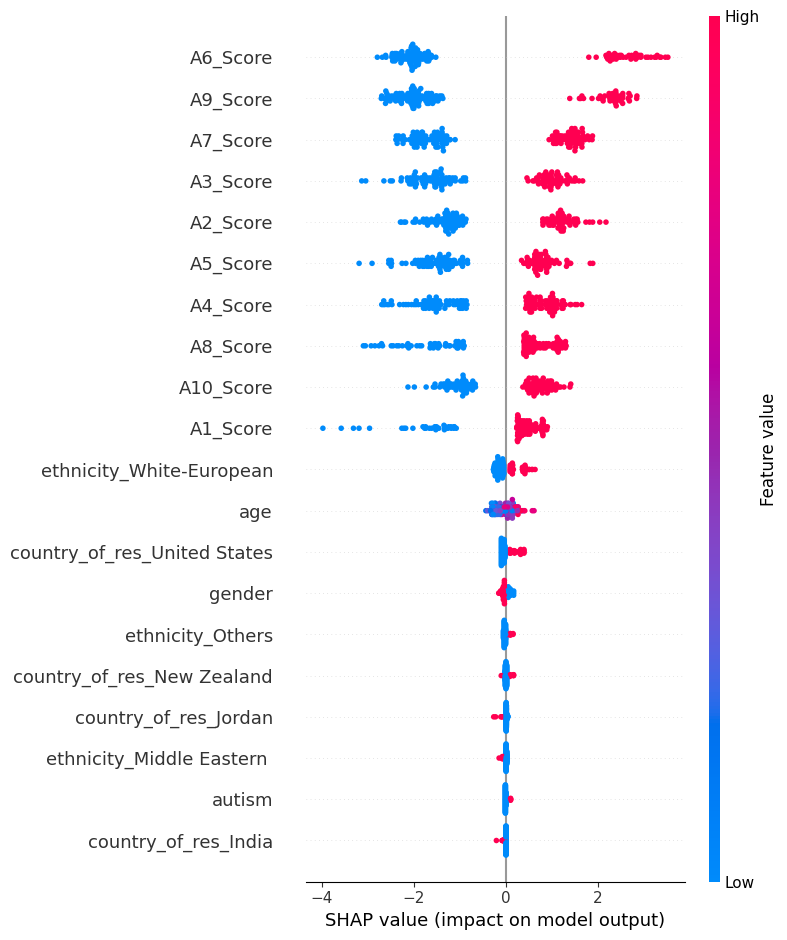

In [18]:
import shap

# We Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [19]:
shap.plots.bar(shap_values)


TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

In [20]:
# Explaining the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=X.columns)


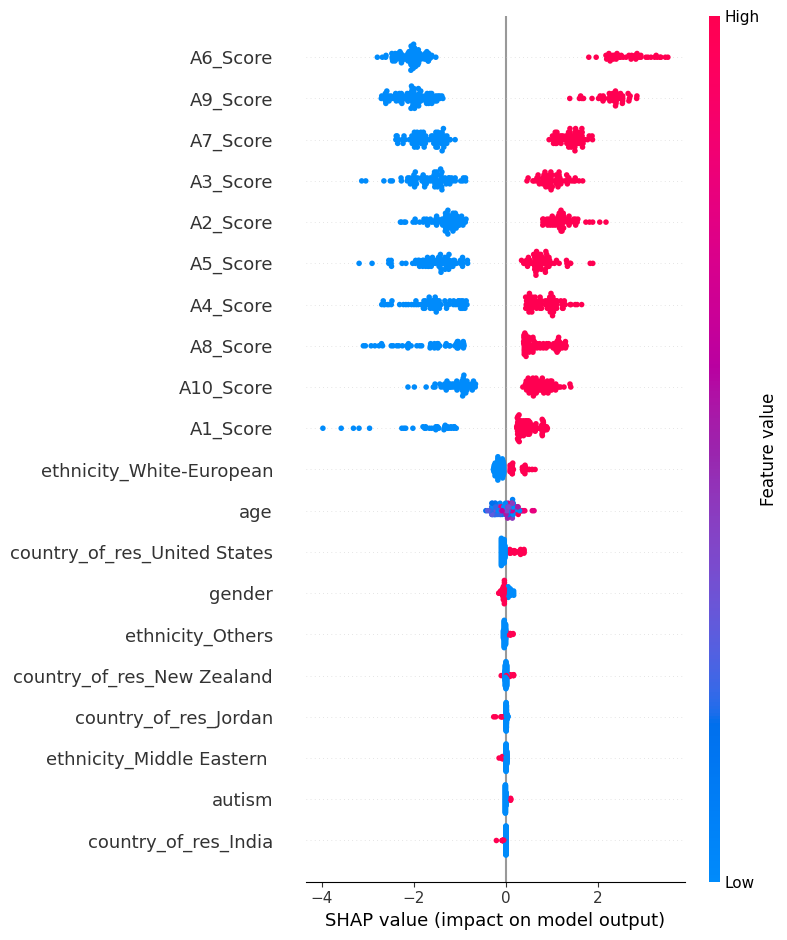

In [21]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [22]:
pip install xgboost lightgbm catboost shap

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   - -------------------------------------- 3.1/102.4 MB 20.4 MB/s eta 0:00:05
   -- ------------------------------------- 7.1/102.4 MB 17.3 MB/s eta 0:00:06
   ---- ----------------------------------- 12.6/102.4 MB 20.2 MB/s eta 0:00:05
   ------ --------------------------------- 17.3/102.4 MB 20.6 MB/s eta 0:00:05
   -------- ------------------------------- 21.5/102.4 MB 20.6 MB/s eta 0:00:04
   ---------- ----------------------------- 26.0/102.4 MB 20.8 MB/s eta 0:00:04
   ------------ --------------------------- 31.2/102.4 MB 21.4 MB/s eta 0:00:04
   -------------- ------------------------- 36.4/102.4 MB 21.9 MB/s eta 0:00:04
   ---------------- ----------------------- 41.9/102.4 MB 22.3 MB/s eta 0:00:03
   ------------------ --------------------- 46.7/102.4 MB 22.6 MB


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import shap
import matplotlib.pyplot as plt


In [24]:
def train_and_evaluate(model, name, X_train, y_train, X_test, y_test):
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    return model, acc


In [25]:
results = {}

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb, acc_xgb = train_and_evaluate(xgb, "XGBoost", X_train_bal, y_train_bal, X_test, y_test)
results['XGBoost'] = acc_xgb

# LightGBM
lgb = LGBMClassifier(random_state=42)
lgb, acc_lgb = train_and_evaluate(lgb, "LightGBM", X_train_bal, y_train_bal, X_test, y_test)
results['LightGBM'] = acc_lgb

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat, acc_cat = train_and_evaluate(cat, "CatBoost", X_train_bal, y_train_bal, X_test, y_test)
results['CatBoost'] = acc_cat



--- XGBoost ---
Accuracy: 0.9716312056737588
Confusion Matrix:
 [[101   4]
 [  0  36]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.90      1.00      0.95        36

    accuracy                           0.97       141
   macro avg       0.95      0.98      0.96       141
weighted avg       0.97      0.97      0.97       141


--- LightGBM ---
[LightGBM] [Info] Number of positive: 410, number of negative: 410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 466
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with pos

In [26]:
print("\n--- Model Accuracy Comparison ---")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")



--- Model Accuracy Comparison ---
XGBoost: 0.9716
LightGBM: 0.9574
CatBoost: 1.0000


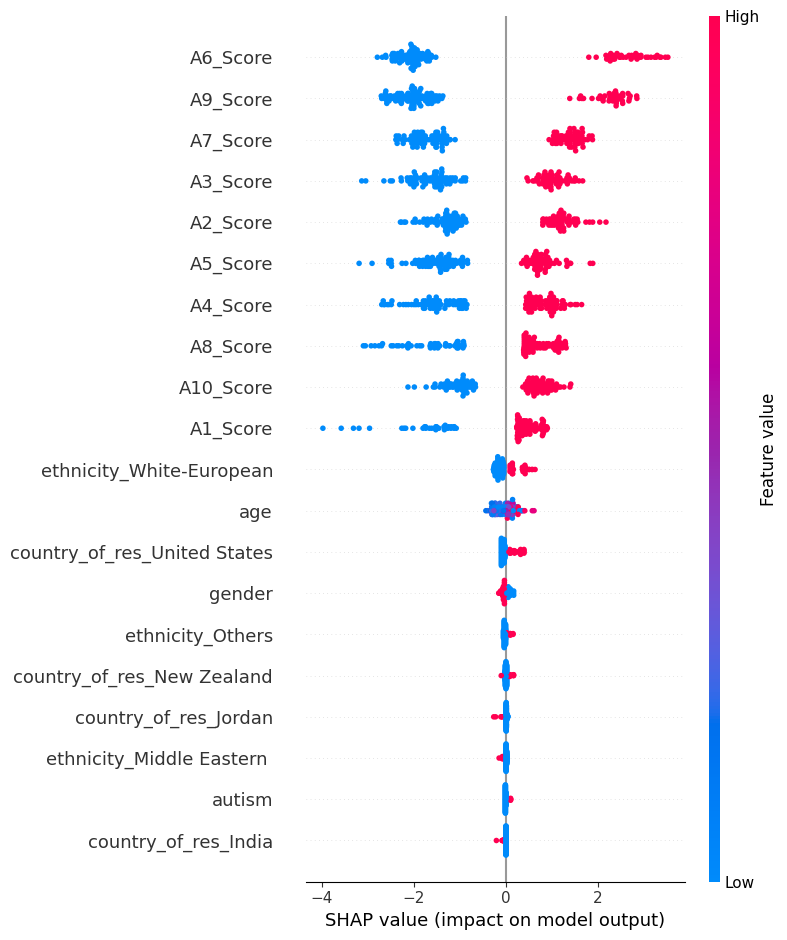

In [27]:
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

shap.summary_plot(shap_values_xgb, X_test, feature_names=X.columns)


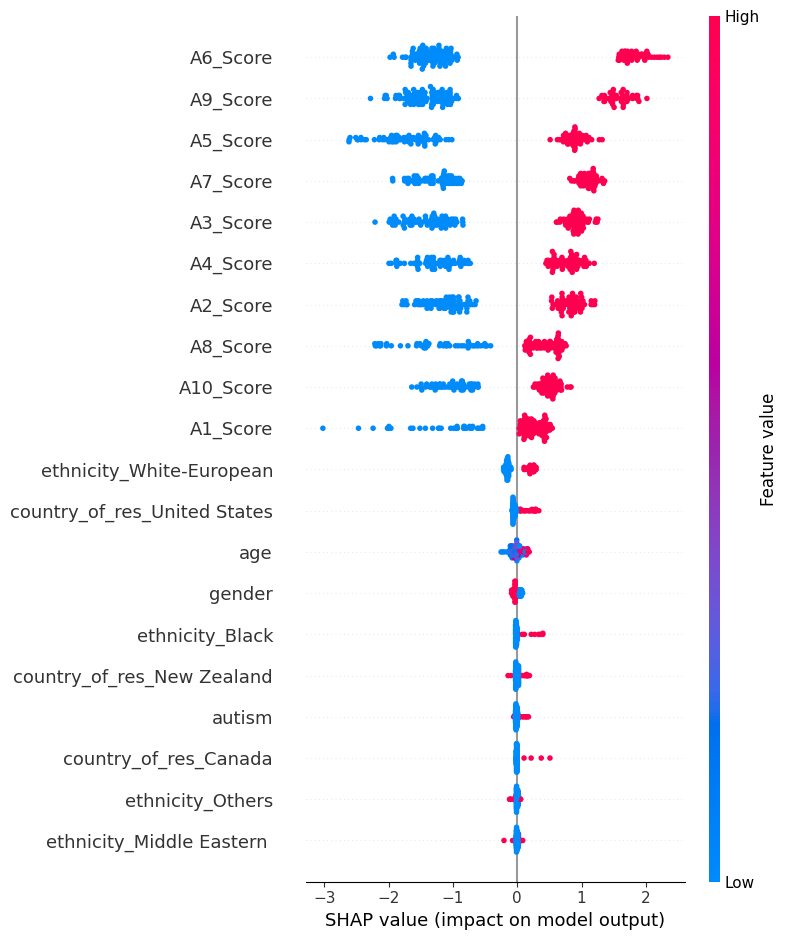

In [28]:
explainer_cat = shap.TreeExplainer(cat)
shap_values_cat = explainer_cat.shap_values(X_test)

shap.summary_plot(shap_values_cat, X_test, feature_names=X.columns)


In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [30]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [31]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, 
                        scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_xgb.fit(X_train_bal, y_train_bal)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [32]:
print("Best Parameters:", grid_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_xgb.best_score_)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9853658536585366


In [33]:
best_xgb = grid_xgb.best_estimator_

y_pred = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9929078014184397
Confusion Matrix:
 [[104   1]
 [  0  36]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.97      1.00      0.99        36

    accuracy                           0.99       141
   macro avg       0.99      1.00      0.99       141
weighted avg       0.99      0.99      0.99       141



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("cleaned_autism_data.csv")

# Encode categorical features (convert to numeric)
df_encoded = pd.get_dummies(df.drop("Class/ASD", axis=1), drop_first=True)

# Target
y = df["Class/ASD"].map({"YES": 1, "NO": 0})  # Map yes/no to 1/0

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(df_encoded, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

print("Balanced dataset shape:", X_balanced.shape, y_balanced.shape)


Balanced dataset shape: (1030, 95) (1030,)


In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# Base learners
base_learners = [
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss')),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42))
]


In [14]:
# Meta model (final predictor)
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)


In [15]:
stacking_clf.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interac...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('lgbm', LGBMClassifier(random_state=42)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x000002352FC242B0>)],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1)

In [16]:
y_pred = stacking_clf.predict(X_test)

print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Stacking Model Accuracy: 0.9563106796116505

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        97
           1       0.96      0.95      0.96       109

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206


Confusion Matrix:
 [[ 93   4]
 [  5 104]]


In [1]:
pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----------------------------- ---------- 1.6/2.1 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("cleaned_autism_data.csv")

y_raw = df["Class/ASD"]
y = y_raw.map({"YES":1,"Yes":1,"yes":1,"1":1,1:1,"NO":0,"No":0,"no":0,"0":0,0:0}).astype(int) if y_raw.dtype == "O" else y_raw.astype(int)
X = df.drop(columns=["Class/ASD"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = X_train.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["number","bool"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)


In [10]:
import optuna
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "eval_metric": "logloss",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1,
    }
    model = xgb.XGBClassifier(**params)
    pipe = Pipeline([("prep", preprocessor), ("clf", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    return accuracy_score(y_test, preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)


[I 2025-08-21 17:39:44,573] A new study created in memory with name: no-name-25b66f80-8ed6-4de4-9b01-56d3c1ed668c
[I 2025-08-21 17:39:44,751] Trial 0 finished with value: 0.9078014184397163 and parameters: {'n_estimators': 237, 'max_depth': 8, 'learning_rate': 0.14511743979054637, 'subsample': 0.654143799501591, 'colsample_bytree': 0.8476569941728718, 'gamma': 4.070609869753657, 'reg_alpha': 4.337342230147512, 'reg_lambda': 3.6536079286259824}. Best is trial 0 with value: 0.9078014184397163.
[I 2025-08-21 17:39:44,912] Trial 1 finished with value: 0.9078014184397163 and parameters: {'n_estimators': 233, 'max_depth': 7, 'learning_rate': 0.024282914045712232, 'subsample': 0.6437663001514723, 'colsample_bytree': 0.8830031893462899, 'gamma': 4.650086535510477, 'reg_alpha': 2.7427093666938793, 'reg_lambda': 3.113934701621601}. Best is trial 0 with value: 0.9078014184397163.
[I 2025-08-21 17:39:45,072] Trial 2 finished with value: 0.9361702127659575 and parameters: {'n_estimators': 293, 'max

Best Hyperparameters: {'n_estimators': 488, 'max_depth': 11, 'learning_rate': 0.1429180467434405, 'subsample': 0.999673145104446, 'colsample_bytree': 0.6957056768529115, 'gamma': 0.04432074171248699, 'reg_alpha': 0.05772598145758878, 'reg_lambda': 0.11762247394578654}
Best Accuracy: 0.9929078014184397


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

best_params = study.best_params
best_params.update({"eval_metric":"logloss","tree_method":"hist","random_state":42,"n_jobs":-1})
final_model = xgb.XGBClassifier(**best_params)
final_pipe = Pipeline([("prep", preprocessor), ("clf", final_model)])
final_pipe.fit(X_train, y_train)

y_pred = final_pipe.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9929078014184397
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.97      0.99        38

    accuracy                           0.99       141
   macro avg       1.00      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

Confusion Matrix:
 [[103   0]
 [  1  37]]


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv("cleaned_autism_data.csv")

# Encode categorical columns
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Split features and target
X = data.drop("Class/ASD", axis=1)   # replace with your actual target column
y = data["Class/ASD"]


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
base_models = [
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="logloss")),
    ("lgbm", LGBMClassifier()),
    ("cat", CatBoostClassifier(verbose=0)),
    ("rf", RandomForestClassifier())
]

# Stacking model
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)


C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 153, number of negative: 410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 563, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271758 -> initscore=-0.985719
[LightGBM] [Info] Start training from score -0.985719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:55] WARNING: C:\actions-r

[LightGBM] [Info] Number of positive: 122, number of negative: 328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271111 -> initscore=-0.988993
[LightGBM] [Info] Start training from score -0.988993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = stack_model.predict(X_test)

print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Stacking Model Accuracy: 0.9787234042553191

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.92      1.00      0.96        36

    accuracy                           0.98       141
   macro avg       0.96      0.99      0.97       141
weighted avg       0.98      0.98      0.98       141


Confusion Matrix:
 [[102   3]
 [  0  36]]


In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("cleaned_autism_data.csv")

# Quick check
print(df.shape)
print(df.head())

(704, 19)
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender       ethnicity jaundice autism  \
0         1         0          0   26      f  White-European       no     no   
1         1         0          1   24      m          Latino       no    yes   
2         1         1          1   27      m          Latino      yes    yes   
3         1         0          1   35      f  White-European       no    yes   
4         1         0          0   40      f          Others       no     no   

   contry_of_res used_app_before relation Class/ASD  
0  U

In [7]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'contry_of_res', 'used_app_before',
       'relation', 'Class/ASD'],
      dtype='object')


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def evaluate_ml_model(model, X_test, y_test, model_name="Model"):
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype("int32")

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred_proba)
    }

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("cleaned_autism_data.csv")

# Encode categorical columns
categorical_cols = ['gender', 'ethnicity', 'jaundice', 'autism',
                    'contry_of_res', 'used_app_before', 'relation']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Features and target
X = df.drop("Class/ASD", axis=1)
y = df["Class/ASD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("cleaned_autism_data.csv")

# Encode categorical columns
categorical_cols = ['gender', 'ethnicity', 'jaundice', 'autism',
                    'contry_of_res', 'used_app_before', 'relation']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Encode target column ("NO"/"YES" → 0/1)
df["Class/ASD"] = df["Class/ASD"].map({"NO": 0, "YES": 1})

# Features and target
X = df.drop("Class/ASD", axis=1)
y = df["Class/ASD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8,
    colsample_bytree=0.8, eval_metric="logloss", random_state=42
)
xgb_model.fit(X_train, y_train)

# CatBoost
cat_model = CatBoostClassifier(
    iterations=300, learning_rate=0.05, depth=6,
    verbose=0, random_state=42
)
cat_model.fit(X_train, y_train)

# LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=-1,
    random_state=42
)
lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 151, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 563, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268206 -> initscore=-1.003744
[LightGBM] [Info] Start training from score -1.003744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(learning_rate=0.05, n_estimators=300, random_state=42)

In [11]:
results = []
results.append(evaluate_ml_model(logreg_model, X_test, y_test, "Logistic Regression"))
results.append(evaluate_ml_model(rf_model, X_test, y_test, "Random Forest"))
results.append(evaluate_ml_model(xgb_model, X_test, y_test, "XGBoost"))
results.append(evaluate_ml_model(cat_model, X_test, y_test, "CatBoost"))
results.append(evaluate_ml_model(lgbm_model, X_test, y_test, "LightGBM"))

results_df = pd.DataFrame(results).round(3)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1 Score    AUC
0  Logistic Regression     0.979      1.000   0.921     0.959  1.000
1        Random Forest     0.957      0.971   0.868     0.917  0.991
2              XGBoost     0.986      1.000   0.947     0.973  0.998
3             CatBoost     0.972      0.972   0.921     0.946  0.998
4             LightGBM     0.957      0.971   0.868     0.917  0.993


✅ Using model variable: xgb_model


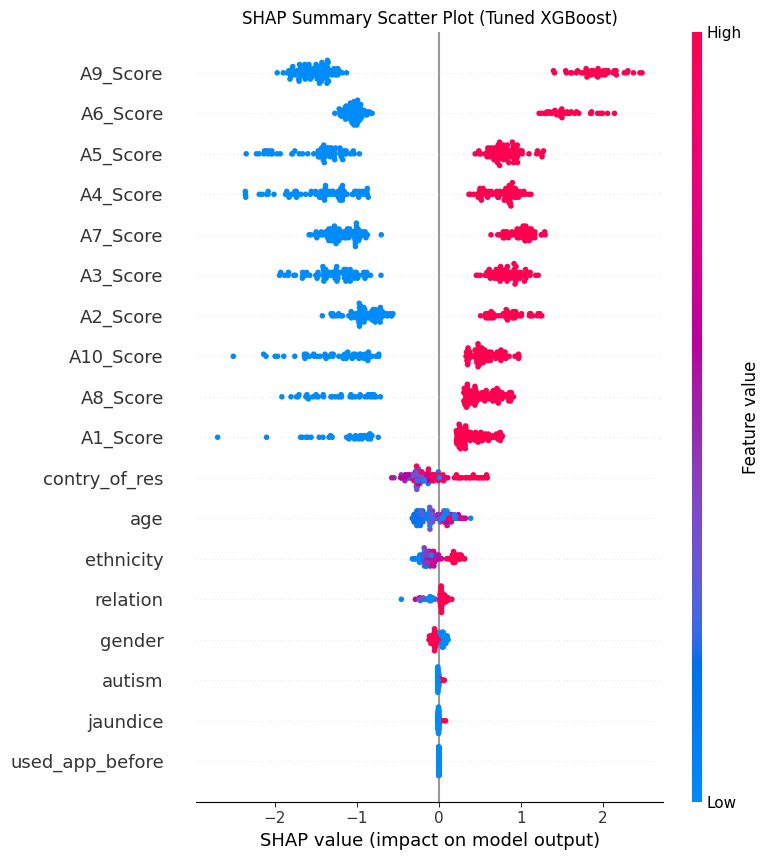

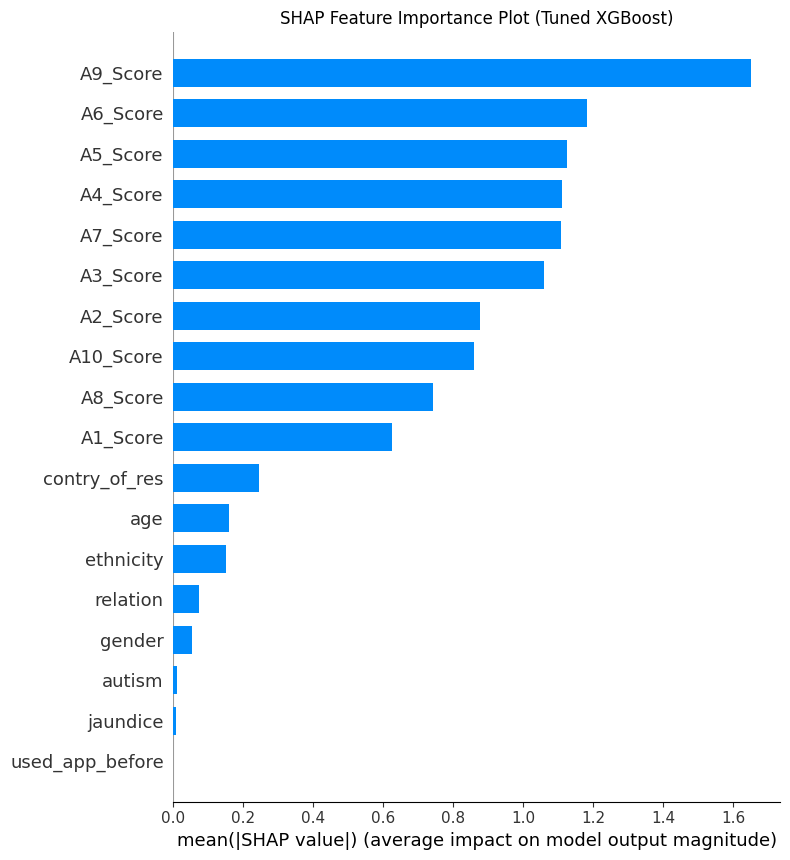

In [12]:
# ============================================
# 🧠 SHAP Explainability for Tuned XGBoost Model (Auto-Detect)
# ============================================
import shap
import matplotlib.pyplot as plt

# Automatically detect which XGBoost model variable exists
model_candidates = ['xgb_model', 'best_xgb', 'xgb']
xgb_used = None

for var_name in model_candidates:
    if var_name in globals():
        xgb_used = globals()[var_name]
        print(f"✅ Using model variable: {var_name}")
        break

if xgb_used is None:
    raise NameError("❌ No XGBoost model variable found! Please ensure your model is trained and available (xgb_model / best_xgb / xgb).")

# Ensure X_test exists
if 'X_test' not in globals():
    raise NameError("❌ X_test not found. Please run the cell where you split your dataset.")

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_used)
shap_values = explainer.shap_values(X_test)

# --------------------------------------------
# 1️⃣ SHAP Summary Scatter Plot
# --------------------------------------------
plt.title("SHAP Summary Scatter Plot (Tuned XGBoost)")
shap.summary_plot(shap_values, X_test, plot_type="dot")

# --------------------------------------------
# 2️⃣ SHAP Feature Importance Plot (Bar)
# --------------------------------------------
plt.title("SHAP Feature Importance Plot (Tuned XGBoost)")
shap.summary_plot(shap_values, X_test, plot_type="bar")
